# Decision Tree

Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
# import some data to play with
fraud_data = pd.read_csv('Fraud_check.csv')

In [ ]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud_data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [ ]:
fraud_data.shape

(600, 6)

In [ ]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [ ]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [ ]:
fraud_data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


In [ ]:
# Convert 'Taxable.Income' to numeric type
fraud_data['Taxable.Income'] = pd.to_numeric(fraud_data['Taxable.Income'], errors='coerce')

In [ ]:
# Apply lambda function to create 'Risk_Category' column
fraud_data['Risk_Category'] = fraud_data['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Risk_Category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [ ]:
# Drop the original 'Taxable.Income' column
fraud_data.drop(columns=['Taxable.Income'], axis = 1,inplace=True)


In [ ]:
fraud_data.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Risk_Category
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [ ]:
fraud_data['Risk_Category'].unique()

array(['Good', 'Risky'], dtype=object)

In [ ]:
fraud_data['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [ ]:
fraud_data['Marital.Status'] = fraud_data['Marital.Status'].replace({'Single': 0, 'Married': 1, 'Divorced': 2})

In [ ]:
# Encode categorical variables
fraud_data_encoded = pd.get_dummies(fraud_data, columns=['Undergrad','Urban','Risk_Category'], drop_first=True)

In [ ]:
fraud_data_encoded.head()

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Risk_Category_Risky
0,0,50047,10,0,1,0
1,2,134075,18,1,1,0
2,1,160205,30,0,1,0
3,0,193264,15,1,1,0
4,1,27533,28,0,0,0


In [ ]:
fraud_data_encoded['Risk_Category_Risky'].unique()

array([0, 1], dtype=uint8)

In [ ]:
fraud_data_encoded['Urban_YES'].unique()

array([1, 0], dtype=uint8)

In [ ]:
fraud_data_encoded.Risk_Category_Risky.value_counts()

0    476
1    124
Name: Risk_Category_Risky, dtype: int64

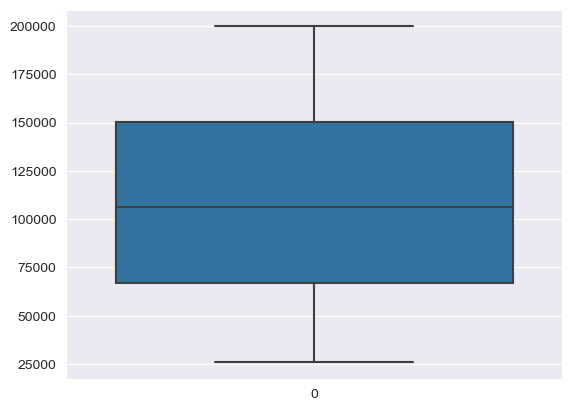

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=fraud_data['City.Population'])
plt.show()


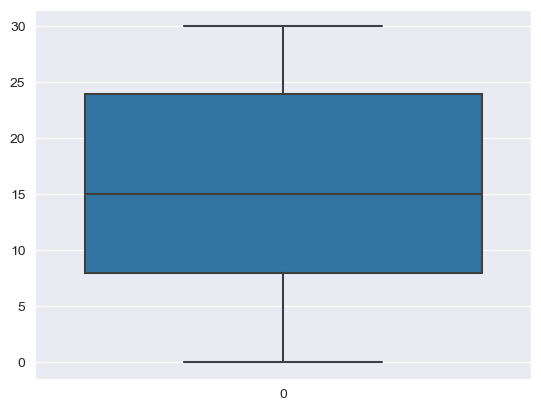

In [ ]:
sns.boxplot(data=fraud_data['Work.Experience'])
plt.show()

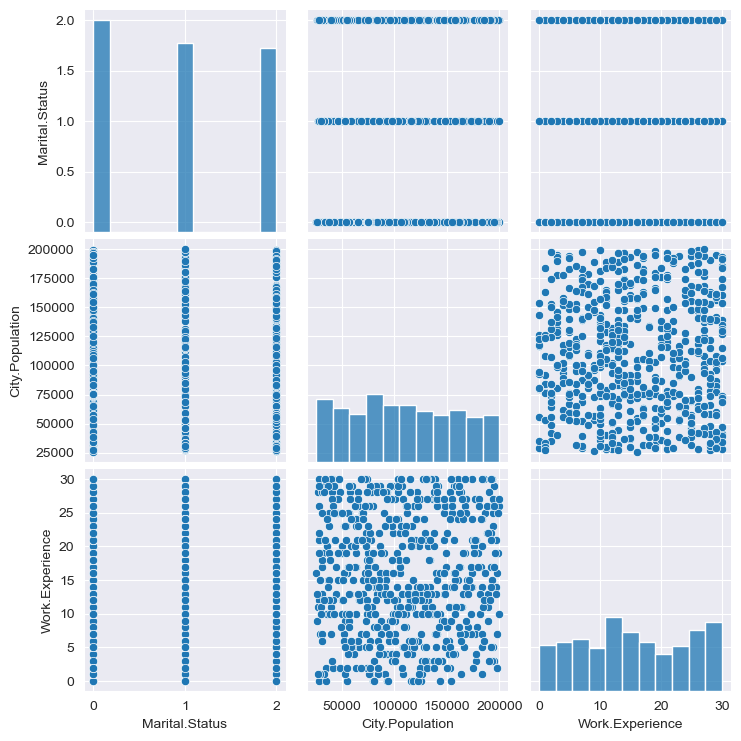

In [ ]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(fraud_data)

In [ ]:
# Split data into features and target variable
X = fraud_data_encoded.drop(columns=['Risk_Category_Risky'])
y =fraud_data_encoded['Risk_Category_Risky']

# Building Decission Tree Model

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build decision tree model
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

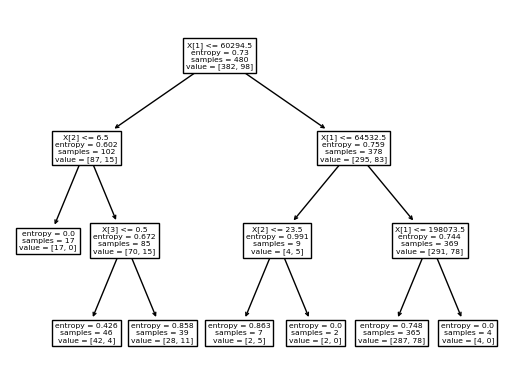

In [ ]:
#PLot the decision tree
tree.plot_tree(model);


In [ ]:
text = tree.export_text(model,max_depth=3)
print(text)

|--- feature_1 <= 60294.50
|   |--- feature_2 <= 6.50
|   |   |--- class: 0
|   |--- feature_2 >  6.50
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- class: 0
|--- feature_1 >  60294.50
|   |--- feature_1 <= 64532.50
|   |   |--- feature_2 <= 23.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  23.50
|   |   |   |--- class: 0
|   |--- feature_1 >  64532.50
|   |   |--- feature_1 <= 198073.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  198073.50
|   |   |   |--- class: 0



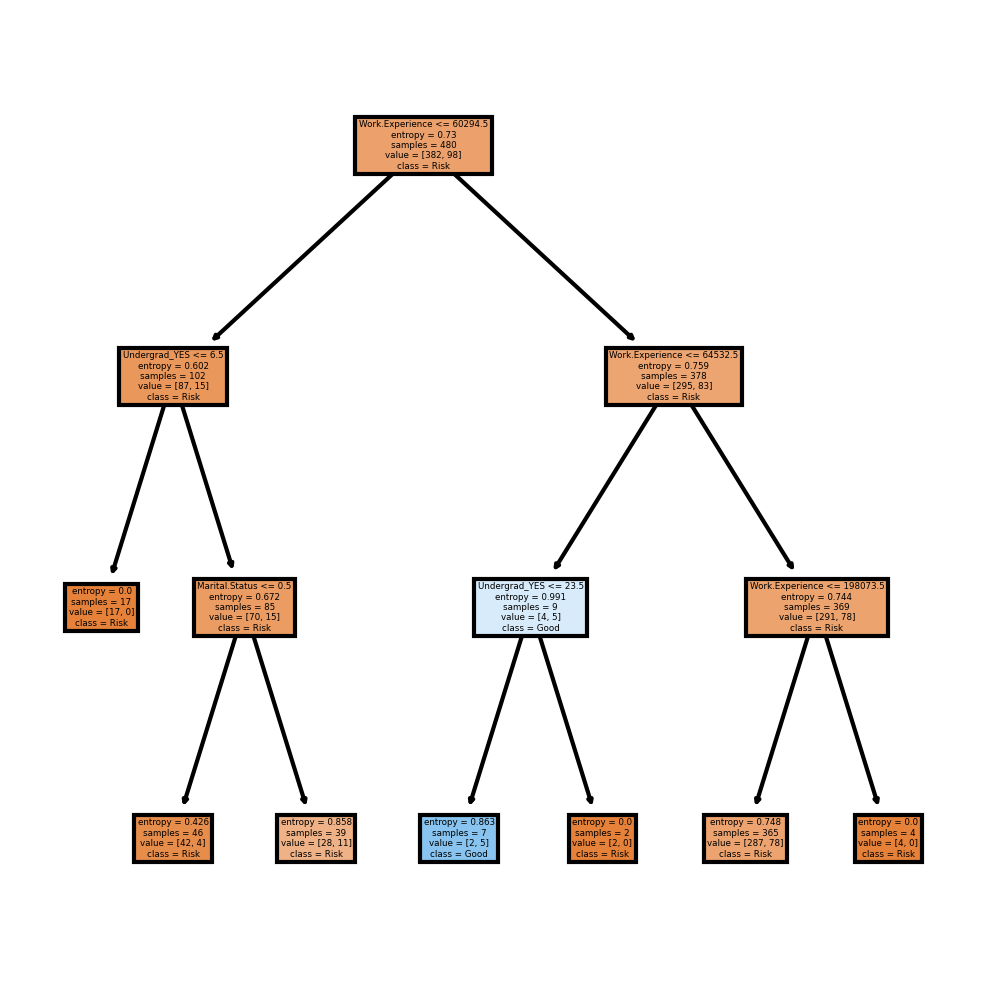

In [ ]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status','Urban_YES']
cn=['Risk', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);


In [ ]:
fraud_data_encoded.head()

,Marital.Status,City.Population,Work.Experience,Undergrad_YES,Urban_YES,Risk_Category_Risky
0,0,50047,10,0,1,0
1,2,134075,18,1,1,0
2,1,160205,30,0,1,0
3,0,193264,15,1,1,0
4,1,27533,28,0,0,0


In [ ]:
model.feature_importances_

array([0.        , 0.38089844, 0.39522517, 0.22387639, 0.        ])

In [ ]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False)
feature_imp

Undergrad_YES      0.395225
Work.Experience    0.380898
Marital.Status     0.223876
City.Population    0.000000
Urban_YES          0.000000
dtype: float64

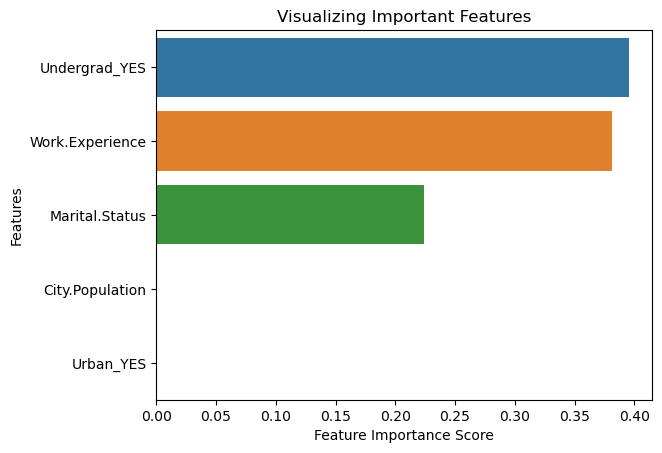

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    118
1      2
dtype: int64

In [ ]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Risk_Category_Risky,,
0,92,2
1,26,0


In [ ]:
# Accuracy
np.mean(preds==y_test)

0.7666666666666667

In [ ]:
#Find the training accuracy
model.score(X_train, y_train)

0.8020833333333334